In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
categorical_cols = df.select_dtypes(include = 'object').columns

In [6]:
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [7]:
# c_cols = df.iloc[:,0:5].columns

In [8]:
# c_cols

In [9]:
for i in categorical_cols:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [59]:
df.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,72.666667,1,1
1,0,2,1,69,90,88,82.333333,1,0
2,0,1,2,90,95,93,92.666667,1,1
3,1,0,3,47,57,44,49.333333,0,1
4,1,2,1,76,78,75,76.333333,1,1


In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot: xlabel='gender', ylabel='count'>

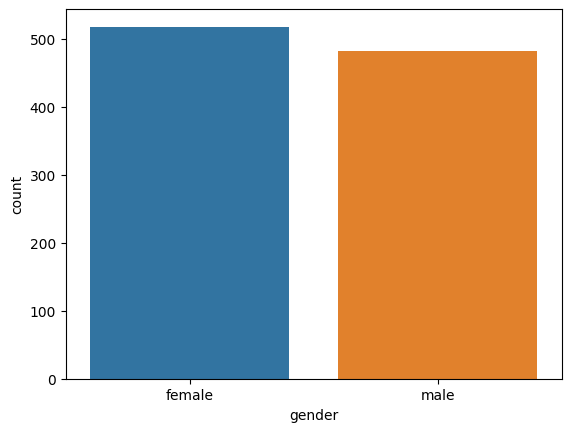

In [11]:
sns.countplot(x=df['gender'])

# Checking whether it is balanced or not, It is balanced

# Now, check how many student take preparatory classes

In [12]:
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index

In [13]:
count_test

none         642
completed    358
Name: test preparation course, dtype: int64

In [14]:
labels

Index(['none', 'completed'], dtype='object')

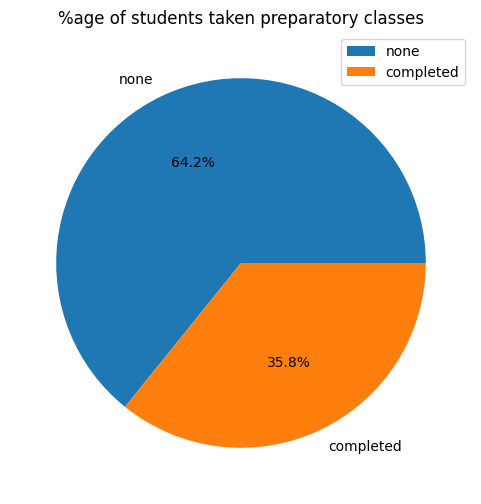

In [15]:
plt.figure(figsize = (6,6))
plt.pie(count_test, labels = labels, autopct='%1.1f%%') # autopct : for showing data in %age
plt.legend(labels)
plt.title('%age of students taken preparatory classes')
plt.show()

# To make a good analysis let's make an 'Avg_Score' column 

In [16]:
df['average_score'] = df.iloc[:,5:8].mean(axis = 1)

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# Let's check which student has max average score: male or female 

<AxesSubplot: xlabel='average_score', ylabel='math score'>

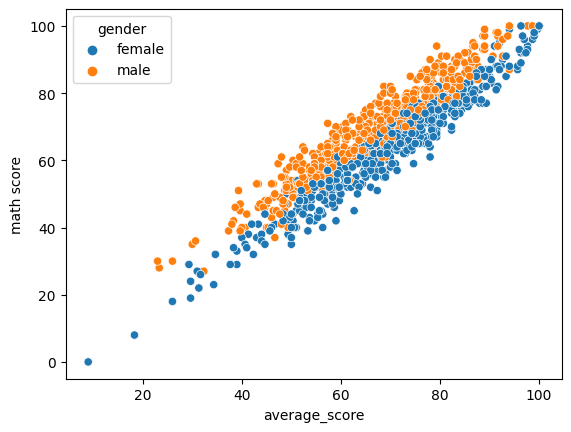

In [18]:
sns.scatterplot(x=df['average_score'], y=df['math score'], hue=df['gender'])

In [19]:
# df.()

# One Hot Encoding:

In [20]:
gender = {
    'male':1,
    'female':0
}

In [21]:
race = {
    'group A' :0,
    'group B' :1,
    'group C' :2,
    'group D' :3,
    'group E' :4
}

In [22]:
df['gender']=df['gender'].map(gender)

In [23]:
df['race/ethnicity'] = df['race/ethnicity'].map(race)

In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,standard,none,72,72,74,72.666667
1,0,2,some college,standard,completed,69,90,88,82.333333
2,0,1,master's degree,standard,none,90,95,93,92.666667
3,1,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,2,some college,standard,none,76,78,75,76.333333


# Let's work on 'parental level of education ' column

In [25]:
level = {
    "bachelor's degree" :0,
    "some college" : 1,
    "master's degree" :2,
    "associate's degree" :3,
    "high school" : 4,
    "some high school" : 5
}

In [26]:
df['parental level of education'] = df['parental level of education'].map(level)

In [27]:
df = pd.get_dummies(df,drop_first=True)

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,72.666667,1,1
1,0,2,1,69,90,88,82.333333,1,0
2,0,1,2,90,95,93,92.666667,1,1
3,1,0,3,47,57,44,49.333333,0,1
4,1,2,1,76,78,75,76.333333,1,1


In [29]:
x = df.drop(columns = 'average_score').values

In [30]:
x

array([[ 0,  1,  0, ..., 74,  1,  1],
       [ 0,  2,  1, ..., 88,  1,  0],
       [ 0,  1,  2, ..., 93,  1,  1],
       ...,
       [ 0,  2,  4, ..., 65,  0,  0],
       [ 0,  3,  1, ..., 77,  1,  0],
       [ 0,  3,  1, ..., 86,  0,  1]], dtype=int64)

In [31]:
y = df['average_score'].values

In [32]:
y

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model = RandomForestRegressor()

In [37]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
predictions = model.predict(x_test)

In [39]:
predictions

array([86.63      , 63.46333333, 74.23666667, 75.23666667, 81.36      ,
       78.09333333, 67.04333333, 59.21333333, 77.26333333, 49.63333333,
       46.85333333, 27.56333333, 75.64333333, 58.43      , 84.09666667,
       74.41333333, 49.77      , 48.06666667, 52.69333333, 60.98333333,
       73.07666667, 49.89666667, 65.76      , 44.46333333, 78.61      ,
       77.2       , 71.48666667, 50.02666667, 43.36666667, 55.64666667,
       59.73666667, 67.14666667, 60.79333333, 73.00333333, 77.17      ,
       51.63666667, 75.61666667, 74.25666667, 75.40666667, 22.46      ,
       78.05666667, 64.45333333, 65.6       , 60.93      , 84.79666667,
       64.57333333, 71.01      , 29.93666667, 86.14666667, 78.96      ,
       71.70333333, 71.40666667, 77.90333333, 53.65      , 70.86      ,
       72.11666667, 82.04      , 54.71666667, 82.53333333, 88.82      ,
       43.57666667, 80.80666667, 78.71333333, 61.25666667, 87.38333333,
       73.45333333, 65.33      , 54.38      , 63.84666667, 88.62

In [40]:
from sklearn.metrics import r2_score

In [41]:
print(r2_score(predictions, y_test))

0.9941683972422252


In [42]:
df.head()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,72.666667,1,1
1,0,2,1,69,90,88,82.333333,1,0
2,0,1,2,90,95,93,92.666667,1,1
3,1,0,3,47,57,44,49.333333,0,1
4,1,2,1,76,78,75,76.333333,1,1


# Save ML Model

In [43]:
# import joblib
# joblib.dump(model, 'Performace_Predictor.pkl')

In [44]:
import pickle
pickle.dump(model, open("Predictor.pkl", "wb"))

In [45]:
# Model = joblib.load("Student_Performace_Predictor.pkl")

In [46]:
# un = df.drop(columns = 'average_score')

In [47]:
# u1 = un.iloc[0,:].values

In [48]:
# u1

In [49]:
# Model.predict(u1)

In [50]:
# df.head()

In [51]:
# Model.predict(un)

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()

In [56]:
regressor.fit(x_train, y_train)

LinearRegression()

In [58]:
# regressor.score(x_train, y_train)

In [52]:
# Model.predict([[0],[2],[1],[69],[90],[88],[1],[0]])